In [21]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

In [7]:
# 자료 가져오기
df = pd.read_excel("../02/02_역주행사고.xlsx")
df

,년도,구분,사고,사망
0,2019,전체,4223,206
1,2019,역주행,28,5
2,2020,전체,4039,223
3,2020,역주행,33,3
4,2021,전체,4883,191
5,2021,역주행,27,2


In [8]:
# 데이터테이블 분리
df1 = df[df['구분'] == '전체']
df1

,년도,구분,사고,사망
0,2019,전체,4223,206
2,2020,전체,4039,223
4,2021,전체,4883,191


In [9]:
df2 = df[df['구분'] == '역주행']
df2

,년도,구분,사고,사망
1,2019,역주행,28,5
3,2020,역주행,33,3
5,2021,역주행,27,2


In [13]:
df3 = df1.copy()
df3['구분'] = '일반'
df3

,년도,구분,사고,사망
0,2019,일반,4223,206
2,2020,일반,4039,223
4,2021,일반,4883,191


In [14]:
import numpy as np

In [22]:
# 데이터프레임 인덱스
# 행 인덱스
list(df.index)

[0, 1, 2, 3, 4, 5]

In [23]:
# 열 인덱스
list(df.columns)

['년도', '구분', '사고', '사망']

In [24]:
df.loc[:,"사고":]

,사고,사망
0,4223,206
1,28,5
2,4039,223
3,33,3
4,4883,191
5,27,2


In [26]:
df.loc[:,['구분','사고']]

,구분,사고
0,전체,4223
1,역주행,28
2,전체,4039
3,역주행,33
4,전체,4883
5,역주행,27


In [25]:
df.iloc[:,2:]

,사고,사망
0,4223,206
1,28,5
2,4039,223
3,33,3
4,4883,191
5,27,2


In [41]:
df3.loc[:, '사고':'사망'] = np.array(df1.loc[:, '사고':'사망']) - np.array(df2.loc[:, "사고":"사망"])
df3

,년도,구분,사고,사망,치명률
0,2019,일반,4195,201,4.79
2,2020,일반,4006,220,5.49
4,2021,일반,4856,189,3.89


C:\Users\user\AppData\Local\Temp\ipykernel_14212\2802868949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['치명률'] = round(df2['사망'] / df2['사고'] * 100, 2)


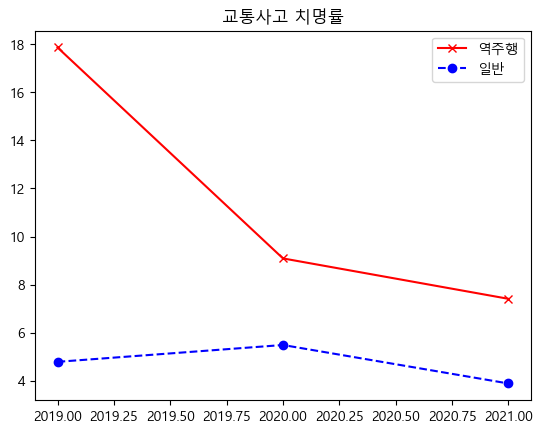

In [39]:
df2['치명률'] = round(df2['사망'] / df2['사고'] * 100, 2)
df3['치명률'] = round(df3['사망'] / df3['사고'] * 100, 2)
y2 = list(df2['치명률'])
y3 = list(df3['치명률'])
x = list(df2['년도'])
plt.plot(x, y2, 'rx-', label="역주행")
plt.plot(x, y3, 'bo--', label="일반")
plt.title('교통사고 치명률')
plt.legend()
plt.show()